In [1]:
import os
import sys
sys.path.append(os.path.abspath('../scripts'))
fig_path      = '../figures/'
data_path     = '../data/'

In [2]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd 
import seaborn as sns
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from proj_utils import *
from mapping_utils import *


In [3]:
c_nadw  = '#648fff'
c_lsw   = '#785ef0'
c_neadw = '#dc267f'
c_dsow  = '#fe6100'
c_lnadw = '#ffb000'

## (1) Load NC of transport files from here: https://zenodo.org/records/31382

In [4]:
ds_zantopp = xr.open_dataset(data_path + 'DWBC_trsp.nc')

In [5]:
ds_zantopp

<xarray.Dataset> Size: 35kB
Dimensions:     (TIME: 1078, LATITUDE: 1, LONGITUDE: 1, DEPTH: 1)
Coordinates:
  * TIME        (TIME) datetime64[ns] 9kB 1997-08-01 1997-08-06 ... 2012-04-29
  * LATITUDE    (LATITUDE) float32 4B 53.0
  * LONGITUDE   (LONGITUDE) float32 4B -51.0
  * DEPTH       (DEPTH) float32 4B 9.969e+36
Data variables:
    NADW_trsp   (TIME) float32 4kB ...
    LSW_trsp    (TIME) float32 4kB ...
    NEADW_trsp  (TIME) float32 4kB ...
    DSOW_trsp   (TIME) float32 4kB ...
    LNADW_trsp  (TIME) float32 4kB ...
    instr_no    (TIME) float32 4kB ...
Attributes: (12/50)
    title:                      Labrador Sea Deep Western Boundary Current (D...
    long_title:                 5-day averages of DWBC along-shore volume tra...
    comment:                    Time series of Boundary Current transports in...
    institution:                Helmholtz Centre for Ocean Research Kiel
    institution_references:     http://www.geomar.de/en/
    source:                     Moored rotor current meters (RCM); acoustic c...
    ...                         ...
    author:                     ""
    data_assembly_center:       ""
    distribution_statement:     "Follows CLIVAR (Climate Varibility and Predi...
    citation:                   ""
    qc_manual:                  ""
    netcdf_version:             classic

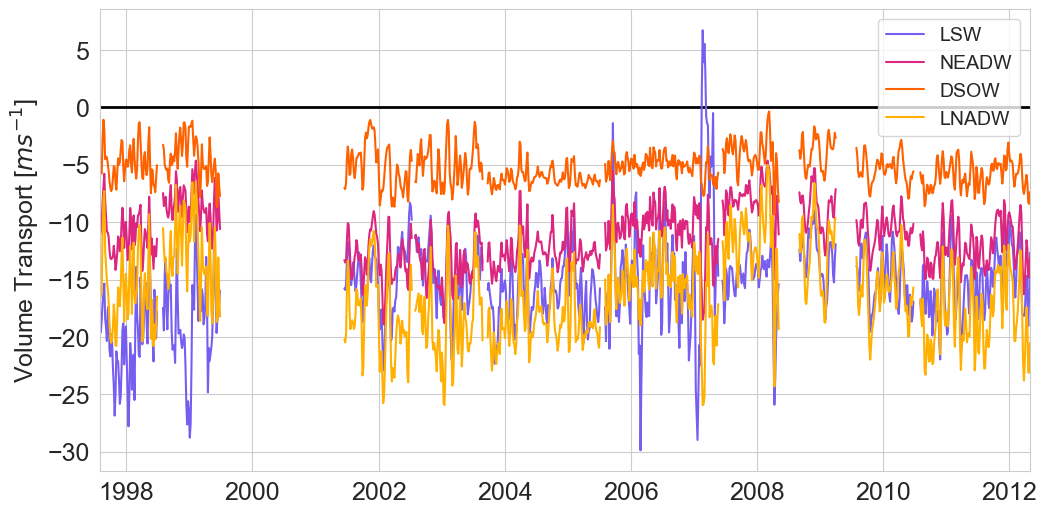

In [6]:
style = sns.set_style("whitegrid")
gsi_c = '#648fff'

fig   = plt.figure(figsize=(12, 6))
zline = plt.axhline(0, color='k', linewidth=2)

#nadw    = plt.plot(ds_zantopp.TIME, ds_zantopp.NADW_trsp, c_nadw, label = 'NADW')
lsw     = plt.plot(ds_zantopp.TIME, ds_zantopp.LSW_trsp/1e6,  c_lsw,  label = 'LSW')
neadw   = plt.plot(ds_zantopp.TIME, ds_zantopp.NEADW_trsp/1e6,c_neadw,label = 'NEADW')
dsow    = plt.plot(ds_zantopp.TIME, ds_zantopp.DSOW_trsp/1e6 ,c_dsow, label = 'DSOW')
lnadw   = plt.plot(ds_zantopp.TIME, ds_zantopp.LNADW_trsp/1e6,c_lnadw,label = 'LNADW')

xtix  = plt.yticks(fontsize=18)
ytix  = plt.xticks(fontsize=18)

ylab  = plt.ylabel('Volume Transport [$ms^{-1}$]', fontsize = 18)
xlab  = plt.xlabel('',fontsize = 18)

xlim  = plt.xlim(ds_zantopp.TIME[0],ds_zantopp.TIME[-1])
#ylim  = plt.ylim(-3.25,3.25)

leg   = plt.legend(fontsize = 14)

#plt.savefig(fig_path + 'gsi_time_series_altimetry.png', format='png', bbox_inches="tight",dpi=500)

## (2) Now Load ECCO Data

In [16]:
ds_ecco = xr.open_dataset(data_path + 'ecco_tile_11_velocities.nc') #velocities
ds_geom = xr.open_dataset(data_path + 'GRID_GEOMETRY_ECCO_V4r5_native_llc0090.nc') #geometry
ds_geom = ds_geom.sel(tile = 10).squeeze()

In [43]:
ds_ecco

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 312, k: 50, j: 90, i_g: 90, j_g: 90, i: 90, k_l: 50,
                k_u: 50, k_p1: 51, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 200B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 5kB ...
    XC_bnds    (j, i, nb) float32 130kB ...
    YC_bnds    (j, i, nb) float32 130kB ...
    Z_bnds     (k, nv) float32 400B ...
Dimensions without coordinates: nv, nb
Data variables:
    UVEL       (time, k, j, i_g) float32 505MB ...
    VVEL       (time, k, j_g, i) float32 505MB ...
    WVEL       (time, k_l, j, i) float32 505MB ...
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Velocity - Monthly Mean llc90...
    uuid:                            26908be4-4182-11eb-98ea-0cc47a3f492b

In [ ]:
# --- Separations by depth ---
# LSW   0400 m - 1850 m
# NEADW 1850 m - 2800 m
# DSOW  2800 m - BOT
# LNADW 1850 m - BOT